In [5]:
import pandas as pd

# read ../data/240104_results_test_set.csv
df = pd.read_csv('../data/240108_sampled_test_set_3_results.csv')
df

,target_id,notifying_party_target,matched_id,notifying_party_matched,distance,legal_type_target,legal_type_matched,expected_result,embeddings_id_1_1,error,cost
0,11445,Advent International GPE VII-F Limited Partner...,11441,Advent International GPE VII-B Limited Partner...,0.994766,1.0,1.0,0,0.0,NaN,0.00531
1,6859,MKM Longboat Multi-Strategy Fund Ltd.,6860,MKM Longboat Multi-Strategy Master Fund Ltd.,0.991328,1.0,1.0,0,0.0,NaN,0.00684
2,13093,Hasso Plattner Verwaltungs- GmbH,5274,Hasso Plattner Verwaltungs-GmbH,0.994777,1.0,1.0,1,1.0,NaN,0.00483
3,8986,DEVK Deutsche Eisenbahn Versicherung Sach- und...,10159,DEVK Deutsche Eisenbahn Versicherung Sach- und...,0.990727,1.0,1.0,1,1.0,NaN,0.00628
4,4314,Providence Equity Operating Partners IV L.P.,4316,Providence Equity Partners IV L.L.C.,0.980670,1.0,1.0,0,0.0,NaN,0.00651
...,...,...,...,...,...,...,...,...,...,...,...
95,10777,IVG Beteiligung I AG & Co. KG,10781,IVG Beteiligung V AG & Co. KG,0.997217,1.0,1.0,0,0.0,NaN,0.00475
96,601,Signes Design et Cie S.C.A.,2501,Signes Design & Cie S.C.A.,0.985306,1.0,1.0,1,1.0,NaN,0.00603
97,12995,"H&F Willis AIV III, L.P.",12993,"H&F Willis AIV I, L.P.",0.992237,1.0,1.0,0,0.0,NaN,0.00613
98,1498,RL & BIG Beteiligungsverwaltung beschr.haft. oHG,580,RL & BIG Beteiligungsverwaltung oHG,0.989137,1.0,1.0,1,0.0,NaN,0.00605


In [6]:
# create a column prediction_correct that is True if embeddings_id_1_1 == correct
df['prediction_correct'] = df['embeddings_id_1_1'] == df['expected_result']
# also set prediction_correct to True if correct and embeddings_id_1_1 are both NaN
df.loc[df['expected_result'].isna() & df['embeddings_id_1_1'].isna(), 'prediction_correct'] = True
# df

In [8]:
# keep only the rows where prediction_correct is False
df_false = df[df['prediction_correct'] == False]
df_false

df_true = df[df['prediction_correct'] == True]
# only show the rows where embeddings_id_1_1 is 1
df_true = df_true[df_true['embeddings_id_1_1'] == 1]

df_true

,target_id,notifying_party_target,matched_id,notifying_party_matched,distance,legal_type_target,legal_type_matched,expected_result,embeddings_id_1_1,error,cost,prediction_correct
2,13093,Hasso Plattner Verwaltungs- GmbH,5274,Hasso Plattner Verwaltungs-GmbH,0.994777,1.0,1.0,1,1.0,NaN,0.00483,True
3,8986,DEVK Deutsche Eisenbahn Versicherung Sach- und...,10159,DEVK Deutsche Eisenbahn Versicherung Sach- und...,0.990727,1.0,1.0,1,1.0,NaN,0.00628,True
5,2161,Madeleine Schickedanz Vermögensverwaltungs Gmb...,4579,Madeleine Schickedanz Vermögensverwaltungs Gmb...,0.998047,1.0,1.0,1,1.0,NaN,0.00757,True
8,3022,Schuler Beteiligungen GmbH,907,Schuler-Beteiligungen GmbH,0.993265,1.0,1.0,1,1.0,NaN,0.00641,True
10,7377,British Empire Securities and General Trust plc.,12655,British Empire Securities and General Trust P L C,0.986052,1.0,1.0,1,1.0,NaN,0.00576,True
15,862,AlliedSignal Chemical Holding Aktiengesellschaf,1213,AlliedSignal Chemical Holding Aktiengesellschaft,0.986779,1.0,1.0,1,1.0,NaN,0.00611,True
18,6821,"Julius Baer Multipartner, SICAV",10987,Julius Baer Multipartner SICAV,0.995576,1.0,1.0,1,1.0,NaN,0.00638,True
19,11143,"Sleep, Zakaria & Co. Ltd",10977,"Sleep, Zakaria & Company Ltd.",0.988127,1.0,1.0,1,1.0,NaN,0.00523,True
21,5373,EM.TV AG,5760,EM.TV AG,0.982105,1.0,1.0,1,1.0,NaN,0.00520,True
25,11163,Mitglieder des Aktienbindungsvertrags Henkel (...,11077,Mitglieder des Aktienbindungsvertrags Henkel (...,0.984509,1.0,1.0,1,1.0,NaN,0.00777,True


In [11]:
df_true.to_csv('../data/240108_test_set_true_examples.csv', index=False)

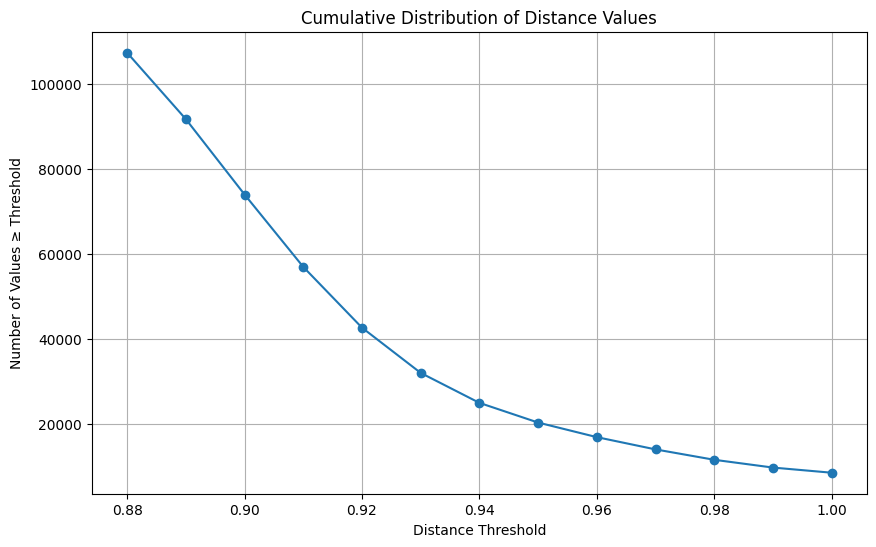

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/240103_highly_scoring_embeddings.csv')

# Assuming your DataFrame is named df and the column of interest is 'distance'
# Ensure the distance values are within the desired range
df_filtered = df[(df['distance'] >= 0.87) & (df['distance'] <= 1)]

# Initialize an empty list to store counts
counts = []

# Loop over the range from 0.99 to 0.87 in decrements of 0.01
for threshold in [1 - 0.01 * i for i in range(13)]:
    count = df_filtered[df_filtered['distance'] >= threshold].shape[0]
    counts.append(count)

# Thresholds for the x-axis
thresholds = [1 - 0.01 * i for i in range(13)]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, counts, marker='o')
plt.title('Cumulative Distribution of Distance Values')
plt.xlabel('Distance Threshold')
plt.ylabel('Number of Values ≥ Threshold')
plt.grid(True)
# save this as png
# plt.savefig('../data/240103_cumulative_distribution.png')
plt.show()



In [16]:
import pandas as pd

df = pd.read_csv('../data/240103_embeddings_top_10_combinations.csv')

# drop the pairs where target_id and matched_id are the same
df = df[df['target_id'] != df['matched_id']]

# create a column with tuples of target_id and match_id
df['pair'] = list(zip(df['target_id'], df['matched_id']))

# drop duplicates based on the pair column
df = df.drop_duplicates(subset='pair')

# drop pair column
df = df.drop(columns=['pair'])

# # keep only the rows where both legal_type_target and legal_type_match are 1
df = df[(df['legal_type_target'] == 1) & (df['legal_type_matched'] == 1)]

# # create a column with tuples of legal_type_target and legal_type_matched
# df['legal_type_pair'] = list(zip(df['legal_type_target'], df['legal_type_matched']))

# # create a dataframe with only the rows where the legal_type_pair is (1, 0)
# df_10 = df[df['legal_type_pair'] == (1, 0)]
# df_10

# create a sample of 100 rows drawn from all rows where distance is above 0.94
df_sample = df[df['distance'] > 0.98].sample(100)
# save to CSV
df_sample.to_csv('../data/240108_sampled_test_set_3.csv', index=False)


In [3]:
df_10

,target_id,notifying_party_target,matched_id,notifying_party_matched,distance,legal_type_target,legal_type_matched,legal_type_pair
281,28,MR Beteiligungen Aktiengesellschaft & Co. Fünf...,54,MR Beteiligungen Aktiengesellschaft & Co. Zwei...,0.970419,1.0,0.0,"(1.0, 0.0)"
471,47,MR Beteiligungen Aktiengesellschaft & Co. Erst...,54,MR Beteiligungen Aktiengesellschaft & Co. Zwei...,0.982991,1.0,0.0,"(1.0, 0.0)"
1079,107,Land Baden-Württemberg,8568,Land Schleswig-Holstein,0.891869,1.0,0.0,"(1.0, 0.0)"
1441,144,"Bausch Gesellschaft bürgerlichen Rechts, Dr. T...",131,"Bausch, Dr., Nicolas",0.925860,1.0,0.0,"(1.0, 0.0)"
1442,144,"Bausch Gesellschaft bürgerlichen Rechts, Dr. T...",3682,"Bausch, Dr. Dr. Thomas",0.918804,1.0,0.0,"(1.0, 0.0)"
...,...,...,...,...,...,...,...,...
144353,14435,"Hartmann, Martin",5034,"Schürmann, Martin",0.934116,1.0,0.0,"(1.0, 0.0)"
144356,14435,"Hartmann, Martin",13630,"Hellstern, Martin",0.919668,1.0,0.0,"(1.0, 0.0)"
144357,14435,"Hartmann, Martin",8359,"Neumann, Hartmut",0.917526,1.0,0.0,"(1.0, 0.0)"
144358,14435,"Hartmann, Martin",13398,"Hesse, Martin",0.915716,1.0,0.0,"(1.0, 0.0)"


In [10]:
df = pd.read_csv('../data/240106_natural_legal_test.csv')
# only keep the columns otifying_party', 'legal_type', 'legal_type_prediction', 'legal_type_prediction_gpt4
df = df[['notifying_party', 'legal_type', 'legal_type_prediction', 'legal_type_prediction_gpt4']]

# rename legal_type_prediction to prediction_gpt_3.5_turbo and legal_type_prediction_gpt4 to prediction_gpt_4
df = df.rename(columns={'legal_type_prediction': 'prediction_gpt_3.5_turbo', 'legal_type_prediction_gpt4': 'prediction_gpt_4'})

# save to CSV
df.to_csv('../data/240106_natural_legal_test_set_results.csv', index=False)
df
# df_correct = df[df['legal_type'] == df['legal_type_prediction_gpt4']]
# df_correct

,notifying_party,legal_type,prediction_gpt_3.5_turbo,prediction_gpt_4
0,ROTHENBERGER Vermögensverwaltung GbR 4xS,1.0,1.0,1.0
1,"Rothenberger, Dr., Helmut",0.0,0.0,0.0
2,"Schneider, Franz Jürgen",0.0,0.0,0.0
3,3i Group plc,1.0,1.0,1.0
4,3i Deutschland Gesellschaft für Industriebetei...,1.0,1.0,1.0
...,...,...,...,...
495,"Merckle, Philipp",0.0,0.0,0.0
496,"Merckle, Ludwig",0.0,0.0,0.0
497,"Merckle, Tobias",0.0,0.0,0.0
498,"Merckle, Adolf",0.0,0.0,0.0


In [17]:
import pandas as pd

# Assuming the CSV files are read into pandas DataFrames
# Replace these lines with pd.read_csv() to read your actual CSV files.
df_embeddings = pd.read_csv('../data/240103_highly_scoring_embeddings.csv')
df_natural_vs_legal = pd.read_csv('../data/240106_natural_vs_legal.csv')

# Merging for target_id
merged_target = pd.merge(df_embeddings, df_natural_vs_legal, left_on='target_id', right_on='id', how='left')
merged_target.rename(columns={'notifying_party': 'notifying_party_target', 'legal_type_prediction_gpt4': 'legal_type_target'}, inplace=True)

# Merging for matched_id
merged_matched = pd.merge(df_embeddings, df_natural_vs_legal, left_on='matched_id', right_on='id', how='left')
merged_matched.rename(columns={'notifying_party': 'notifying_party_matched', 'legal_type_prediction_gpt4': 'legal_type_matched'}, inplace=True)

# Combining the merged dataframes
final_df = pd.concat([merged_target[['target_id', 'notifying_party_target', 'legal_type_target']], 
                      merged_matched[['matched_id', 'notifying_party_matched', 'legal_type_matched']], 
                      merged_target['distance']], axis=1)

# drop the rows where notifying_party_target and notifying_party_matched are the same
final_df = final_df[final_df['notifying_party_target'] != final_df['notifying_party_matched']]

# create a tuple column with notifying_party_target and notifying_party_matched
final_df['notifying_party_pair'] = list(zip(final_df['notifying_party_target'], final_df['notifying_party_matched']))

# drop duplicates based on the notifying_party_pair column
final_df = final_df.drop_duplicates(subset='notifying_party_pair')

# drop notifying_party_pair column
final_df = final_df.drop(columns=['notifying_party_pair'])

# drop rows where either notifying_party_target or notifying_party_matched is NaN
final_df = final_df.dropna(subset=['notifying_party_target', 'notifying_party_matched'])

# You can now use final_df for your analysis or save it to a new CSV file
# final_df.to_csv('240109_pairs_with_fixed_entity_type.csv', index=False)


In [21]:
df = pd.read_csv('../data/240109_pairs_with_fixed_entity_type.csv')

# keep only the rows where both legal_type_target and legal_type_match are 1
df = df[(df['legal_type_target'] == 1) & (df['legal_type_matched'] == 1)]

# keep only the rows where distance is above 0.9
df = df[df['distance'] > 0.9]

# to CSV
df.to_csv('../data/240109_legal_entity_pairs.csv', index=False)
df

,target_id,notifying_party_target,legal_type_target,matched_id,notifying_party_matched,legal_type_matched,distance
0,0,ROTHENBERGER Vermögensverwaltung GbR 4xS,1.0,4535,ROTHENBERGER Vermögensverwaltung 4xS GbR,1.0,0.988794
1,0,ROTHENBERGER Vermögensverwaltung GbR 4xS,1.0,11364,Rothenberger Vermögensverwaltung 4 x S GbR,1.0,0.969066
2,0,ROTHENBERGER Vermögensverwaltung GbR 4xS,1.0,8431,Rothenberger 4 x S Vermögensverwaltung GbR,1.0,0.964600
3,0,ROTHENBERGER Vermögensverwaltung GbR 4xS,1.0,4021,Rothenberger 4 x S Vermögensverwaltung GmbH,1.0,0.961427
4,0,ROTHENBERGER Vermögensverwaltung GbR 4xS,1.0,13727,Rothenberger 4 x S Holding GmbH,1.0,0.907657
...,...,...,...,...,...,...,...
130018,14449,Deichhorst Vermögensverwaltungs GmbH,1.0,8312,H. R. Vermögensverwaltungs GmbH,1.0,0.930311
130019,14449,Deichhorst Vermögensverwaltungs GmbH,1.0,2669,Kirch Vermögens Verwaltungs GmbH,1.0,0.929297
130020,14449,Deichhorst Vermögensverwaltungs GmbH,1.0,12789,Gut Vermögensverwaltungs GmbH,1.0,0.929217
130021,14449,Deichhorst Vermögensverwaltungs GmbH,1.0,6235,J. S. Vermögensverwaltungs- GmbH,1.0,0.928191
